In [45]:
!gdown https://drive.google.com/uc?id=1K4APdA6GUhS57kS6YGMYIU8QhFMHSDLd
!unzip -q ModMonuSeg.zip

Downloading...
From: https://drive.google.com/uc?id=1K4APdA6GUhS57kS6YGMYIU8QhFMHSDLd
To: /content/ModMonuSeg.zip
224MB [00:05, 40.9MB/s]


In [0]:
from ConfigFile import Config
from Unet import Unet

In [74]:
config = Config()
unet_instance = Unet()
X_test, y_test = unet_instance.load_Images(config.test_parent_dir, (config.im_width, config.im_height),
                  config.img_folder, config.gt_folder, config.test_gt_extension)

No. of images =  504


/usr/local/lib/python3.6/dist-packages/keras_preprocessing/image/utils.py:104: UserWarning: grayscale is deprecated. Please use color_mode = "grayscale"
  warnings.warn('grayscale is deprecated. Please use '


In [0]:
input_image = Input((None, None, 3), name='img')
model = unet_instance.buildUnet_Architecture(input_image, n_filters=18, dropout=0.06, batchnorm=True)
model.compile(optimizer=config.optimizer, loss="binary_crossentropy", metrics=["accuracy", unet_instance.dice_coefficient, unet_instance.f1_score])

#Load the best saved model

In [0]:
model.load_weights('unet-model.h5')

##Evaluation##
 **on validation set**

In [78]:
model.evaluate(X_test, y_test, verbose=1)

16/16 [==============================] - 1s 55ms/step - loss: 0.2175 - accuracy: 0.9085 - dice_coefficient: 0.7028 - f1_score: 0.7669


[0.21747033298015594,
 0.9084622859954834,
 0.7028002142906189,
 0.7668851613998413]

# Predict on train, val and test

In [69]:
preds = model.predict(X_test, verbose=1)
preds_t = (preds > 0.5).astype(np.uint8)

16/16 [==============================] - 1s 56ms/step


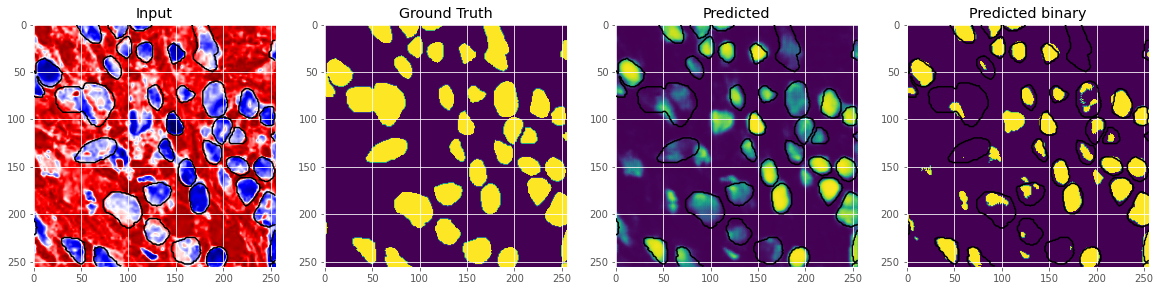

In [70]:
# Check if training data looks all right
unet_instance.plot_sample(X_test, y_test, preds, preds_t)